# Decision Trees

In this lab you will learn the most important aspects of the decision tree learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import DecisionTreeClassifier.

## Problem Setting

First of all, we calculate by hand the impurity measure of splitting some data by some criteria $q$ which in our case is given by a threshold t. Remember, that information gain is calculated as follows: 
$$IG(q) = S_{0} - \sum_{i=1}^{k}\frac{N_{i}(q)}{N}S_{i}(q)$$
where $k$ is the number of groups after partition; $N$ is the total number of examples; $N_{i}(q)$ is the number of examples in the group $i$ and $S$ is the (Shannon) entropy function defined as:
$$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$
where $\hat{p}_{i}$ is the empirical frequency that the randomly chosen object has label $i$.

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

## Entropy
<b>Exercise 1:</b>

Write a function that calculates the entropy defined as: $$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$. <b>Hint:</b> The function input is a vector of labels and the function should return the entropy.

In [2]:
def entropy(y):
    n_labels = len(y)
    if n_labels <= 1:
        return 0
    counts = np.bincount(y)
    p = counts / n_labels
    n_classes = sum(p>0)
    if n_classes <= 1:
        return 0
    return - np.sum(p * np.log(p)) / np.log(n_classes)

In [3]:
entropy(np.array([1,1,0,0,1,1])) - 0.9182957410812378

9.297325165302794e-08

Check if your solution is correct:

In [4]:
try:
    assert entropy(np.array([1,1,0,0])) == 1.
    assert entropy(np.array([0,0])) == 0.
    assert entropy(np.array([1,1,0,0,1,1])) == 0.9182957410812378
    print("Testing successful.")
except:
    print("Tests failed.")

Tests failed.


## Information Gain

<b> Exercise 2:</b>
Write a function that calculates the information gain obtained by setting the threshold $t\in \mathbb{R}$ for data points $x \in \mathbb{R}^{d}$ with label $y\in \mathbb{N}^{d}$. <b>Hint:</b> The function input is a vector x of attribut values, a vector y of labels and a threshold. The function should return the information gain for that specific split.

<b>Example</b>: A split at threshold $t=2$ for data points $x = [1,2,3,4,5]$ and label $y=[1,0,0,0,0,0]$ would result in the lists 
* $x_{left} = [3,4,5]$, $y_{left} = [0,0,0]$ (for $x > t$) and
* $x_{right} = [1,2]$, $y_{right} = [1,0]$ (for $x <= t$).
* Computation of information gain: $\textbf{entropy}([1,0,0,0,0,0]) - (0.6 * \textbf{entropy}([0,0,0]) + (0.4 * \textbf{entropy}([1,0]))$

In [5]:
def info_gain(x,y,t):
    x_right,x_left, y_right,y_left = ([] for i in range(4))
        
    for i in range(len(x)):
        if i < t:
            x_right.append(x[i])
            y_right.append(y[i])
        else:
            x_left.append(x[i])
            y_left.append(y[i])
    return entropy(y) - ((1 - t/len(x))*entropy(y_left) + t/len(x)*entropy(y_right))
   

In [6]:
info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1)

0.10803154614559995

Check if your solution is correct:

In [7]:
try:
    assert info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1) == 0.10803163030328733
    assert info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),3) == 0.39581562117481894
    assert info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5) == 1.
    assert info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),6) == 0.60998651623672373
    print("Testing successful.")
except:
    print("Tests failed.")

Tests failed.


In [8]:
print(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1))

0.10803154614559995


In [9]:
print(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),3))

0.3958156020033583


In [10]:
print(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5) )

1.0


In [11]:
print(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),6))

0.6099865470109875


<b> Exercise 3:</b>

* Create a 2-dimensional data set with the help of the function make_blobs from package sklearn.datasets. The data set should contain 500 data points with 2 clusters (2 classes). The cluster centers should be located at (0,0) and (3,3).
* Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

In [12]:
from sklearn.datasets import make_blobs
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
centers = [(0, 0), (3, 3)]

X, y = make_blobs(n_samples=500, n_features=2, centers=centers, cluster_std=1,center_box =(-4.0, 8.0))
#from solution
#axis([])

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", label="0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", label="1")
plt.legend(loc='upper left', bbox_to_anchor=(1*0.9, 1), ncol=1)
plt.show()

Current size: [6.0, 4.0]


<b>Exercise 4:</b>

Write a function 'find_best_split(x,y)' that gets two input vectors $x \in \mathbb{R}^d$ and $y \in \{0,1\}^d$. This function should return the threshold $t \in x$ with the best split. <b>Hint:</b> Use the function 'info_gain' from exercise 2.

In [73]:
def find_best_split(x,y):
    temp = [info_gain(x,y,i) for i in range(len(y))]
    #print(temp)
    return len(y)- max(enumerate(temp),key=lambda x: x[1])[0]    

Check if your solution is correct:

In [72]:
try:
    assert find_best_split(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0])) == 5
    assert find_best_split(np.array([1,2,2,4,5,6,7,8,9,10]),np.array([1,1,0,0,1,0,0,1,0,0])) == 8    
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b>Exercise 5:</b>

* Find the best splitting for the two dimensions of the data set created in exercise 3. Plot the boundaries in a figure. Your figure should look like this:
<img src="figures/split.png" width="600"/>
* Which split would you prefer, and why?

In [74]:
x_best = find_best_split(X[:,0],y)
y_best = find_best_split(X[:,1],y)



Training Data  :  (478, 2)
Training Target:  (478,)
Testing Data   :  (22, 2)
Testing Target :  (22,)


## Train a Decision Tree
Now we train a decision tree using the sklearn package:

In [79]:
X_train = X[x_best:,:]
y_train = y[y_best:]
X_test  = X[:x_best,:]
y_test  = y[:y_best]

print("Training Data  : ",X_train.shape)
print("Training Target: ",y_train.shape)
print("Testing Data   : ",X_test.shape)
print("Testing Target : " ,y_test.shape)

Training Data  :  (478, 2)
Training Target:  (478,)
Testing Data   :  (22, 2)
Testing Target :  (22,)


In [87]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf_tree.fit(X_train,y_train)
#predict
y_pred = clf_tree.predict(X_test)

print("Test ",sum((y_test - clf_tree.predict(X_test)) ** 2))
print("All ",sum((y - clf_tree.predict(X)) ** 2))

Test  2
All  29


In [88]:
print("Confusion Matrix Between Test and Prediction")
print(classification_report(y_test,y_pred))

Confusion Matrix Between Test and Prediction
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.78      0.88         9

   micro avg       0.91      0.91      0.91        22
   macro avg       0.93      0.89      0.90        22
weighted avg       0.92      0.91      0.91        22



<b>Exercise 6:</b>
* Calculate the predictions for all instances from the training set (use the function predict). Which instances are misclassified? Create a plot that shows which instances are correctly classified and which instances are misclassified. This figure should look like this:
<img src="figures/dec.png" width="600"/>
* Can you find learning parameter for the decision tree classifier (max_depth,min_samples_leaf,max_leaf_nodes,...) to get a classifier that classifies all instances correctly?

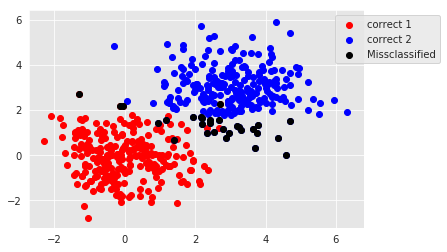

In [89]:
#check the Error
error = y != clf_tree.predict(X)

np.max(error)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", label="correct 1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", label="correct 2")
plt.scatter(X[error == 1, 0], X[error == 1, 1], color="black", label="Missclassified")
plt.legend(loc='upper left', bbox_to_anchor=(1*0.9, 1), ncol=1)